In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [2]:
# loading the data 
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df_train.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [5]:
df_train.shape

(8523, 12)

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [9]:
mean_value = df_train['Item_Weight'].mean()
print(mean_value)

12.857645184135976


In [13]:
mode = df_train['Outlet_Size'].mode()
print(mode)

0    Medium
Name: Outlet_Size, dtype: object


In [31]:
#Data Preprocessing
# Filling missing values in 'Outlet_Size' with mode
mode_of_outlet_size = df_train.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=lambda x: x.mode()[0])
df_train['Outlet_Size'].fillna(df_train['Outlet_Type'].map(mode_of_outlet_size.T.iloc[0]), inplace=True)
df_test['Outlet_Size'].fillna(df_test['Outlet_Type'].map(mode_of_outlet_size.T.iloc[0]), inplace=True)

In [34]:
# Filling missing values in 'Item_Weight' with mean
df_train['Item_Weight'].fillna(df_train['Item_Weight'].mean(), inplace=True)
df_test['Item_Weight'].fillna(df_test['Item_Weight'].mean(), inplace=True)

In [35]:
df_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [18]:
correlation_matrix = df_train.corr()

# Print or inspect the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                           Item_Weight  Item_Visibility  Item_MRP  \
Item_Weight                   1.000000        -0.012049  0.024756   
Item_Visibility              -0.012049         1.000000 -0.001315   
Item_MRP                      0.024756        -0.001315  1.000000   
Outlet_Establishment_Year    -0.008301        -0.074834  0.005020   
Item_Outlet_Sales             0.011550        -0.128625  0.567574   

                           Outlet_Establishment_Year  Item_Outlet_Sales  
Item_Weight                                -0.008301           0.011550  
Item_Visibility                            -0.074834          -0.128625  
Item_MRP                                    0.005020           0.567574  
Outlet_Establishment_Year                   1.000000          -0.049135  
Item_Outlet_Sales                          -0.049135           1.000000  


C:\Users\Dell\AppData\Local\Temp\ipykernel_23184\507087051.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_train.corr()


C:\Users\Dell\AppData\Local\Temp\ipykernel_23184\1159623445.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_train.corr()


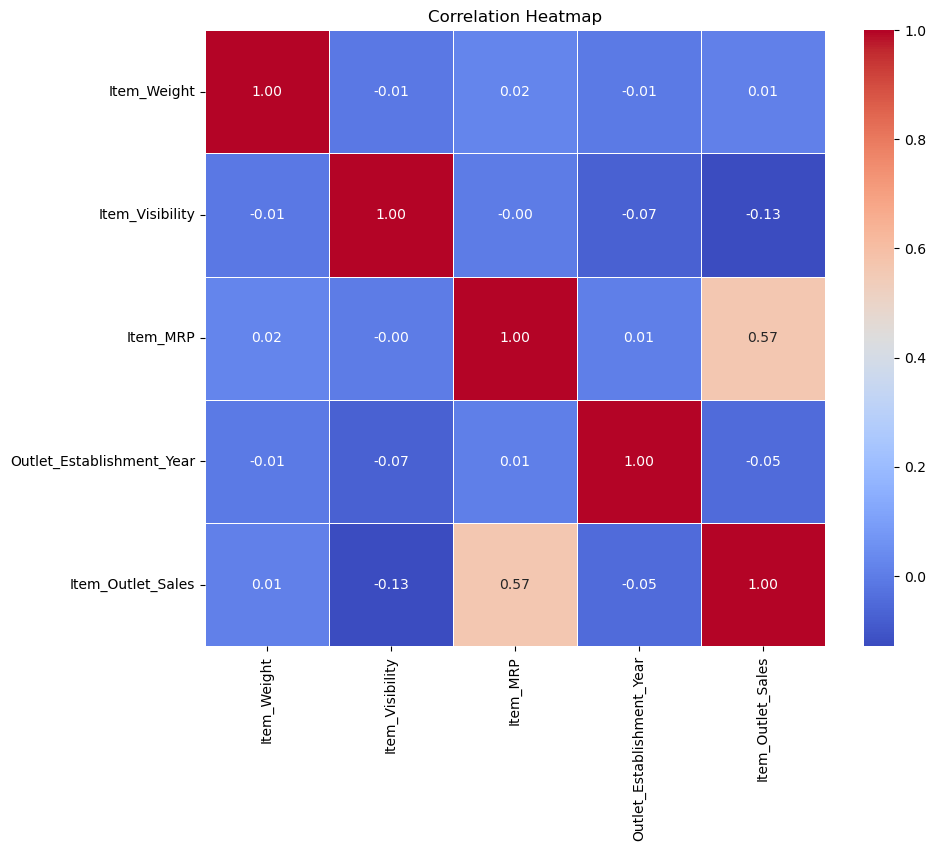

In [19]:
correlation_matrix = df_train.corr()

# Plotting the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_23184\3670664798.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['Item_Weight'])


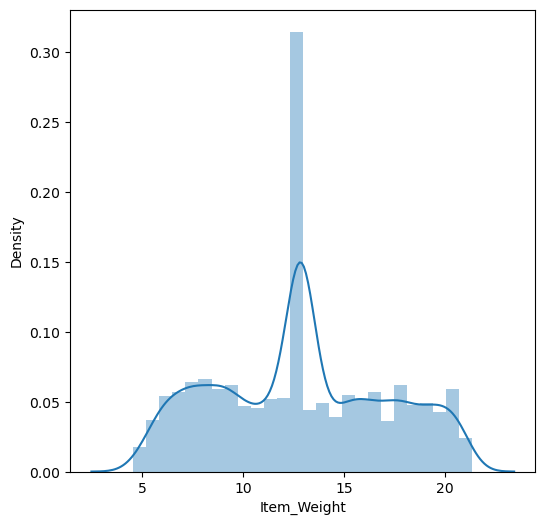

In [20]:
# Item_Weight distribution
plt.figure(figsize=(6, 6))
sns.distplot(df_train['Item_Weight'])
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_23184\4129263711.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['Item_Visibility'])


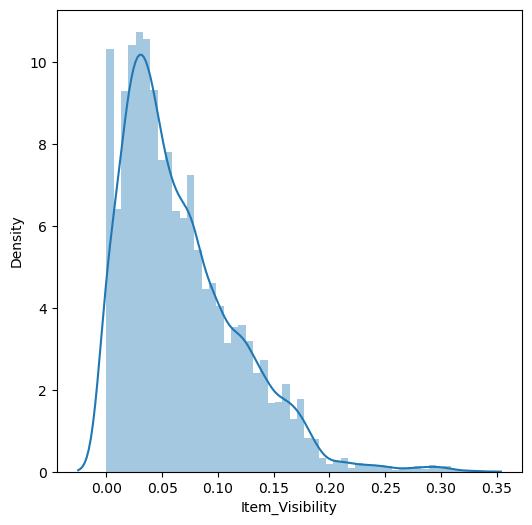

In [21]:
# Item Visibility distribution
plt.figure(figsize=(6, 6))
sns.distplot(df_train['Item_Visibility'])
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_23184\2689879555.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['Item_Outlet_Sales'])


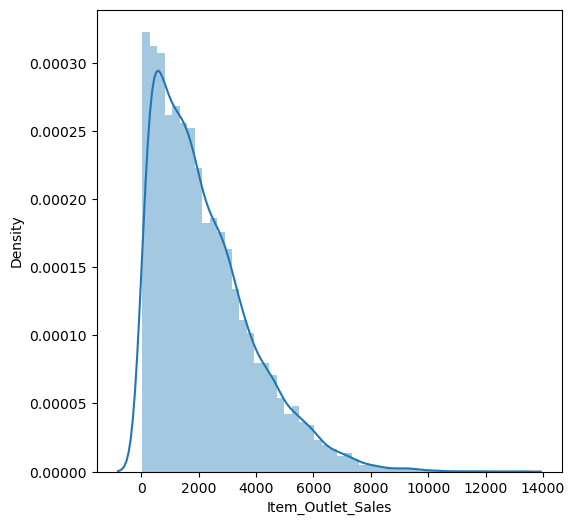

In [22]:
# Item_Outlet_Sales distribution
plt.figure(figsize=(6, 6))
sns.distplot(df_train['Item_Outlet_Sales'])
plt.show()

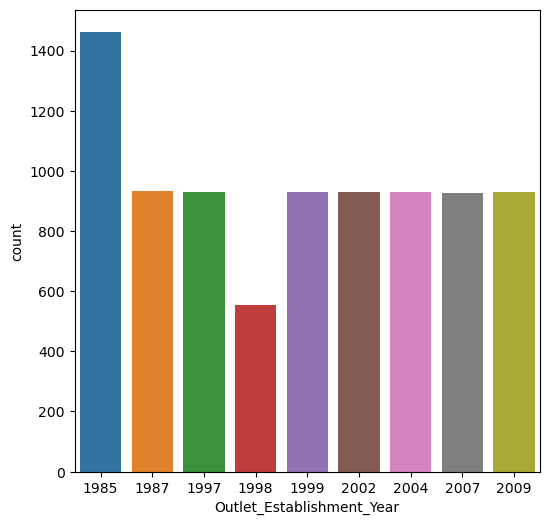

In [23]:
# Outlet_Establishment_Year column
plt.figure(figsize=(6, 6))
sns.countplot(x='Outlet_Establishment_Year', data=df_train)
plt.show()

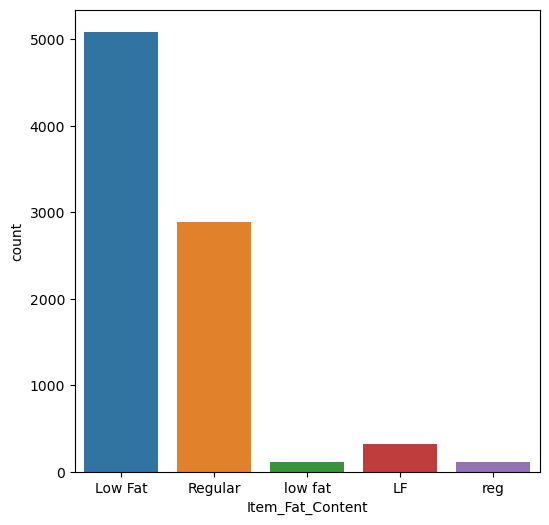

In [25]:
# Item_Fat_Content column
plt.figure(figsize=(6, 6))
sns.countplot(x='Item_Fat_Content', data=df_train)
plt.show()

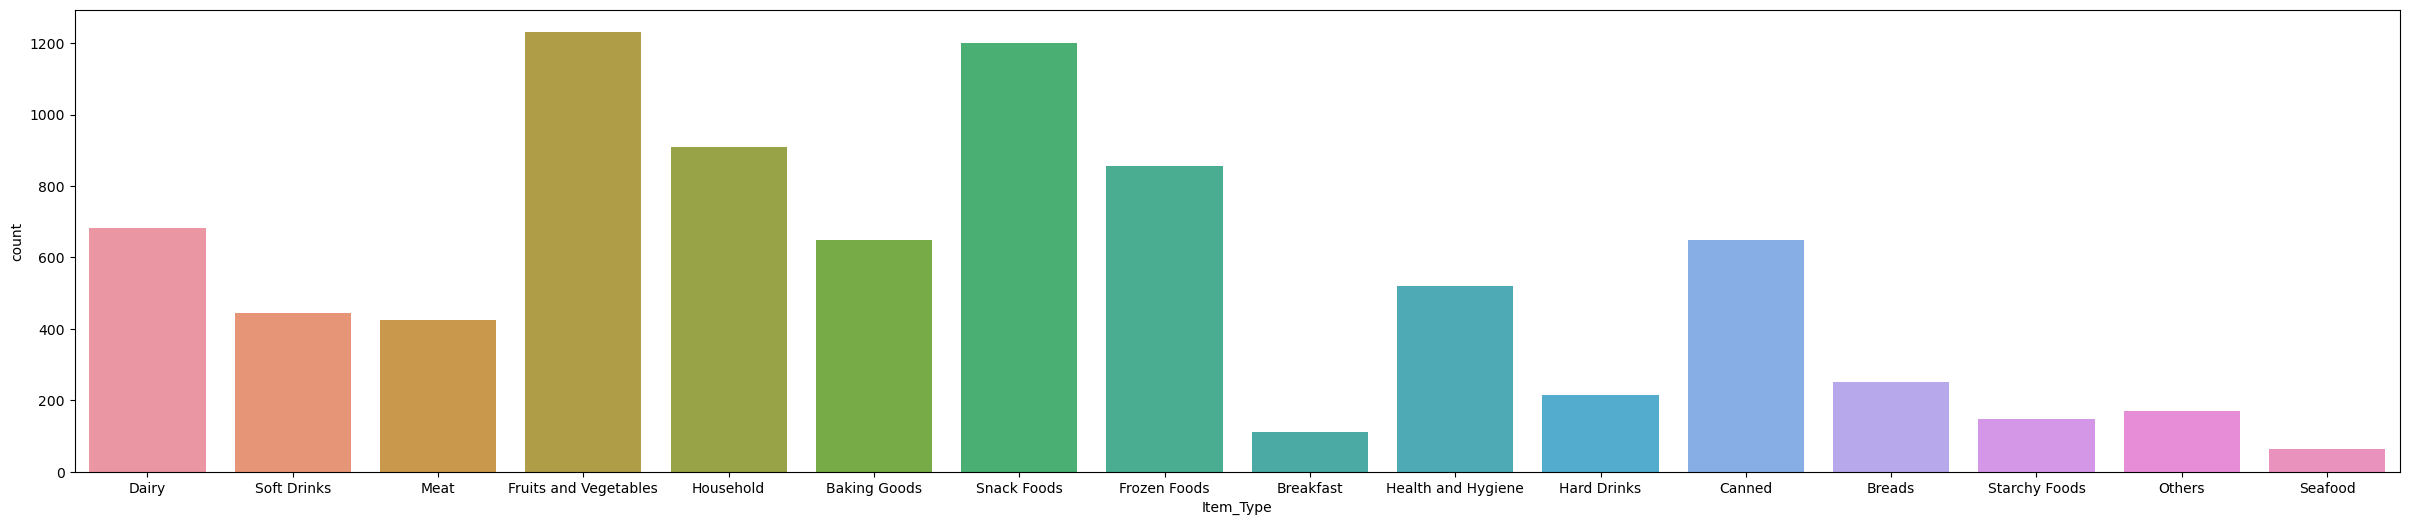

In [26]:
# Item_Type column
plt.figure(figsize=(30, 6))
sns.countplot(x='Item_Type', data=df_train)
plt.show()

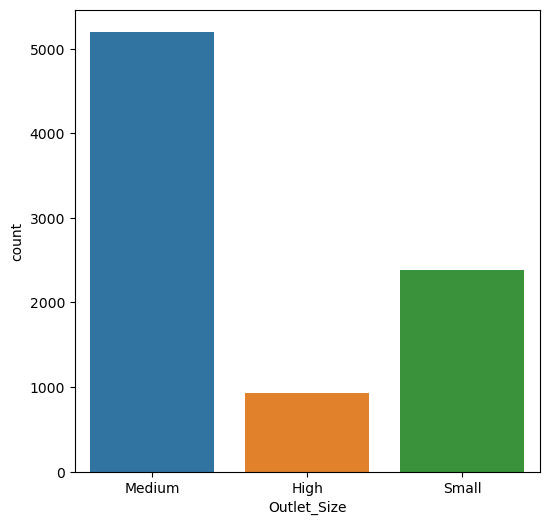

In [27]:
# Outlet_Size column
plt.figure(figsize=(6, 6))
sns.countplot(x='Outlet_Size', data=df_train)
plt.show()

In [36]:
# Replacing categories in 'Item_Fat_Content'
df_train.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}}, inplace=True)
df_test.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}}, inplace=True)

In [37]:
# Label Encoding
encoder = LabelEncoder()
cols_to_encode = ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

for col in cols_to_encode:
    df_train[col] = encoder.fit_transform(df_train[col])
    df_test[col] = encoder.transform(df_test[col])

In [53]:
# Splitting the data into features and target
X = df_train.drop(columns='Item_Outlet_Sales', axis=1)
Y = df_train['Item_Outlet_Sales']

# Splitting the data into training and testing sets
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.15, random_state=42)

# Training the model
regressor = XGBRegressor()
regressor.fit(X_train, Y_train)

# Training the model
regressor = XGBRegressor()
regressor.fit(X_train, Y_train)

# Making predictions on training data
training_data_prediction = regressor.predict(X_train)

# R squared Value for training data
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R Squared value (Training) = ', r2_train)

# Making predictions on validation data
val_data_prediction = regressor.predict(X_val)

# R squared Value for validation data
r2_val = metrics.r2_score(Y_val, val_data_prediction)
print('R Squared value (Validation) = ', r2_val)

# Making predictions on the actual test set
test_set_prediction = regressor.predict(df_test)

R Squared value (Training) =  0.8654058279527632
R Squared value (Validation) =  0.5410061790853332


In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, Y_train)

# Making predictions on validation data with Linear Regression
linear_val_predictions = linear_model.predict(X_val)

# R squared Value for validation data with Linear Regression
r2_val_linear = metrics.r2_score(Y_val, linear_val_predictions)
print('R Squared value (Validation) with Linear Regression = ', r2_val_linear)

R Squared value (Validation) with Linear Regression =  0.5179982231146538


In [54]:

# Random Forest
random_forest_model = RandomForestRegressor(random_state=30, n_estimators=150)
random_forest_model.fit(X_train, Y_train)

# Making predictions on validation data with Random Forest
forest_val_predictions = random_forest_model.predict(X_val)

# R squared Value for validation data with Random Forest
r2_val_forest = metrics.r2_score(Y_val, forest_val_predictions)
print('R Squared value (Validation) with Random Forest = ', r2_val_forest)

R Squared value (Validation) with Random Forest =  0.5761484239036314


In [55]:
# Creating the submission file
submission_df = pd.DataFrame({
    'Item_Identifier': df_test['Item_Identifier'],
    'Outlet_Identifier': df_test['Outlet_Identifier'],
    'Item_Outlet_Sales': test_set_prediction
})

# Saving predictions to CSV
output_path = r'C:\Users\Dell\Desktop\prediction\big_mart_sales_predictions16.csv'
submission_df.to_csv(output_path, index=False)

print(f'Predictions saved to {output_path}')

Predictions saved to C:\Users\Dell\Desktop\prediction\big_mart_sales_predictions16.csv


R Squared value (Training) =  0.8744203127306996
R Squared value (Validation) =  0.5432913169780953
R Squared value (Validation) with Linear Regression =  0.5103357087700753
R Squared value (Validation) with Random Forest =  0.5786598004142829
Predictions saved to C:\Users\Dell\Desktop\prediction\big_mart_sales_predictions14.csv


2024-06-26 03:25:28.932 
  command:

    streamlit run C:\Users\Dell\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


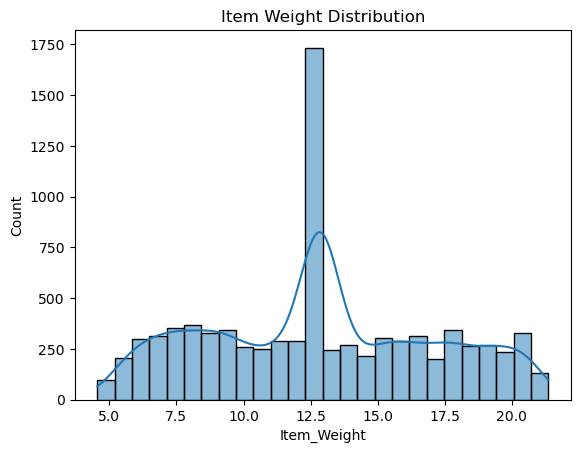

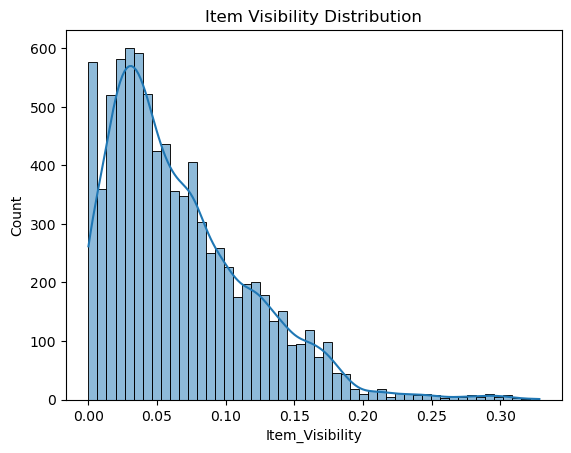

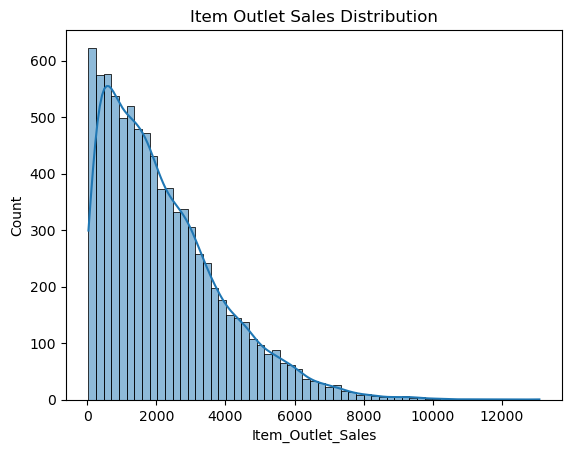

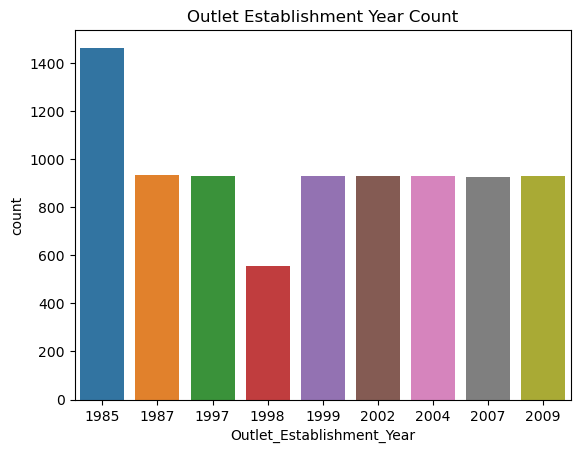

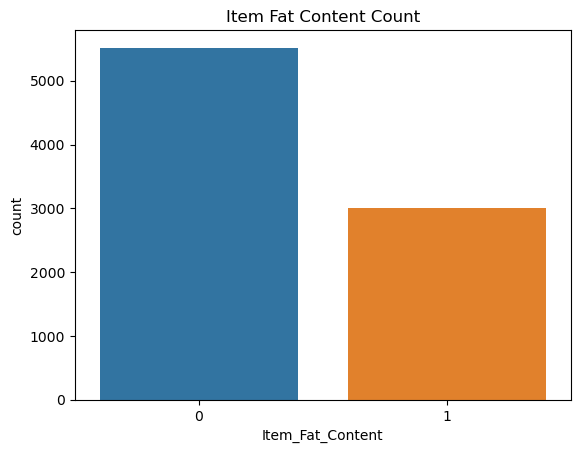

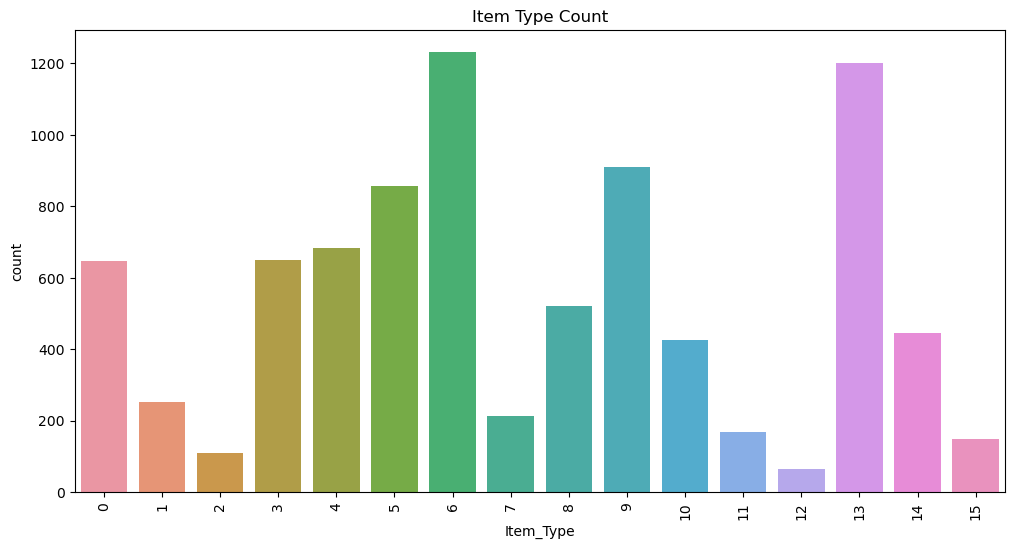

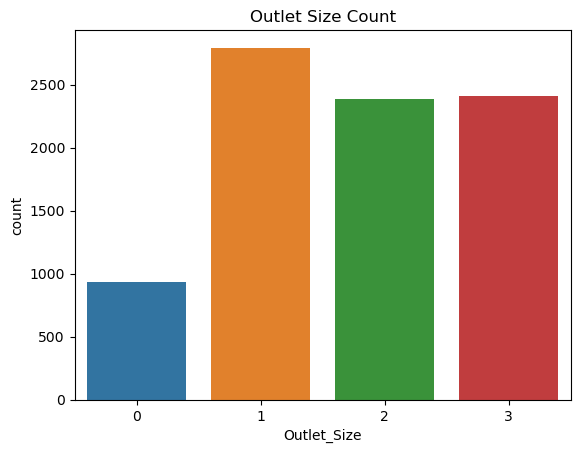

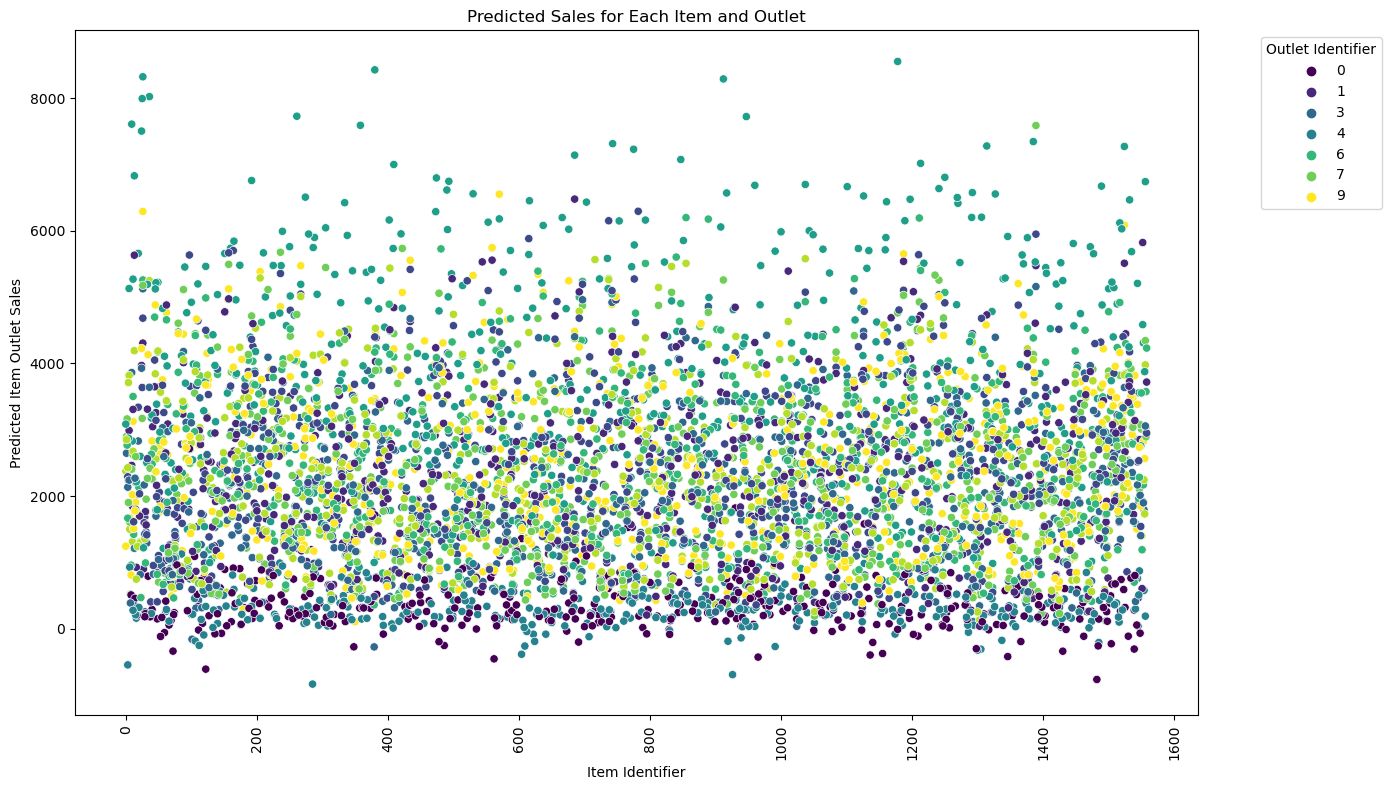

In [56]:
#COMMAND FOR STREAMLIT
import streamlit as st
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Loading the data from CSV files
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

# Data Preprocessing
# Filling missing values in 'Item_Weight' with mean
df_train['Item_Weight'].fillna(df_train['Item_Weight'].mean(), inplace=True)
df_test['Item_Weight'].fillna(df_test['Item_Weight'].mean(), inplace=True)

# Filling missing values in 'Outlet_Size' with mode
mode_of_outlet_size = df_train.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=lambda x: x.mode()[0])
df_train['Outlet_Size'].fillna(df_train['Outlet_Type'].map(mode_of_outlet_size.T.iloc[0]), inplace=True)
df_test['Outlet_Size'].fillna(df_test['Outlet_Type'].map(mode_of_outlet_size.T.iloc[0]), inplace=True)

# Replacing categories in 'Item_Fat_Content'
df_train.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}}, inplace=True)
df_test.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}}, inplace=True)

# Label Encoding
encoder = LabelEncoder()
cols_to_encode = ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

for col in cols_to_encode:
    df_train[col] = encoder.fit_transform(df_train[col])
    df_test[col] = encoder.transform(df_test[col])

# Splitting the data into features and target
X = df_train.drop(columns='Item_Outlet_Sales', axis=1)
Y = df_train['Item_Outlet_Sales']

# Splitting the data into training and testing sets
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=20)

# Training the XGBoost model
regressor = XGBRegressor()
regressor.fit(X_train, Y_train)

# Making predictions on training data
training_data_prediction = regressor.predict(X_train)

# R squared Value for training data
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R Squared value (Training) = ', r2_train)

# Making predictions on validation data
val_data_prediction = regressor.predict(X_val)

# R squared Value for validation data
r2_val = metrics.r2_score(Y_val, val_data_prediction)
print('R Squared value (Validation) = ', r2_val)

# Making predictions on the actual test set
test_set_prediction = regressor.predict(df_test)

# Training the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, Y_train)

# Making predictions on validation data with Linear Regression
linear_val_predictions = linear_model.predict(X_val)

# R squared Value for validation data with Linear Regression
r2_val_linear = metrics.r2_score(Y_val, linear_val_predictions)
print('R Squared value (Validation) with Linear Regression = ', r2_val_linear)

# Training the Random Forest model
random_forest_model = RandomForestRegressor(random_state=22, n_estimators=150)
random_forest_model.fit(X_train, Y_train)

# Making predictions on validation data with Random Forest
forest_val_predictions = random_forest_model.predict(X_val)

# R squared Value for validation data with Random Forest
r2_val_forest = metrics.r2_score(Y_val, forest_val_predictions)
print('R Squared value (Validation) with Random Forest = ', r2_val_forest)

# Creating the submission file
submission_df = pd.DataFrame({
    'Item_Identifier': df_test['Item_Identifier'],
    'Outlet_Identifier': df_test['Outlet_Identifier'],
    'Item_Outlet_Sales': test_set_prediction
})

# Saving predictions to CSV
output_path = r'C:\Users\Dell\Desktop\prediction\big_mart_sales_predictions14.csv'
submission_df.to_csv(output_path, index=False)

print(f'Predictions saved to {output_path}')

# Streamlit Dashboard
st.set_page_config(layout="wide")

# Set background color
st.markdown(
    """
    <style>
    .main {
        background-color: #2E2E2E;
        color: white;
    }
    </style>
    """,
    unsafe_allow_html=True
)

# Main heading
st.title("DASHBOARD")

# Layout the plots in columns
col1, col2, col3 = st.columns(3)

# Plot Item_Weight distribution
with col1:
    st.subheader("Item Weight Distribution")
    fig, ax = plt.subplots()
    sns.histplot(df_train['Item_Weight'], kde=True, ax=ax)
    plt.title('Item Weight Distribution')
    st.pyplot(fig)

# Plot Item_Visibility distribution
with col2:
    st.subheader("Item Visibility Distribution")
    fig, ax = plt.subplots()
    sns.histplot(df_train['Item_Visibility'], kde=True, ax=ax)
    plt.title('Item Visibility Distribution')
    st.pyplot(fig)

# Plot Item_Outlet_Sales distribution
with col3:
    st.subheader("Item Outlet Sales Distribution")
    fig, ax = plt.subplots()
    sns.histplot(df_train['Item_Outlet_Sales'], kde=True, ax=ax)
    plt.title('Item Outlet Sales Distribution')
    st.pyplot(fig)

# Second row of plots
col4, col5, col6 = st.columns(3)

# Plot Outlet_Establishment_Year column
with col4:
    st.subheader("Outlet Establishment Year Count")
    fig, ax = plt.subplots()
    sns.countplot(x='Outlet_Establishment_Year', data=df_train, ax=ax)
    plt.title("Outlet Establishment Year Count")
    st.pyplot(fig)

# Plot Item_Fat_Content column
with col5:
    st.subheader("Item Fat Content Count")
    fig, ax = plt.subplots()
    sns.countplot(x='Item_Fat_Content', data=df_train, ax=ax)
    plt.title("Item Fat Content Count")
    st.pyplot(fig)

# Plot Item_Type column
with col6:
    st.subheader("Item Type Count")
    fig, ax = plt.subplots(figsize=(12, 6))
    sns.countplot(x='Item_Type', data=df_train, ax=ax)
    plt.title("Item Type Count")
    plt.xticks(rotation=90)
    st.pyplot(fig)

# Third row of plots
col7, col8 = st.columns(2)

# Plot Outlet_Size column
with col7:
    st.subheader("Outlet Size Count")
    fig, ax = plt.subplots()
    sns.countplot(x='Outlet_Size', data=df_train, ax=ax)
    plt.title("Outlet Size Count")
    st.pyplot(fig)

# Plot Predicted Sales for Each Item and Outlet
with col8:
    st.subheader("Predicted Sales for Each Item and Outlet")
    fig, ax = plt.subplots(figsize=(14, 8))
    sns.scatterplot(data=submission_df, x='Item_Identifier', y='Item_Outlet_Sales', hue='Outlet_Identifier', palette='viridis', ax=ax)
    plt.title('Predicted Sales for Each Item and Outlet')
    plt.xlabel('Item Identifier')
    plt.ylabel('Predicted Item Outlet Sales')
    plt.xticks(rotation=90)
    plt.legend(title='Outlet Identifier', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    st.pyplot(fig)

# Display R squared values
st.subheader("Model Performance")
st.write(f'R Squared value (Validation) with XGBRegressor = {r2_val:.2f}')
st.write(f'R Squared value (Validation) with Linear Regression = {r2_val_linear:.2f}')
st.write(f'R Squared value (Validation) with Random Forest = {r2_val_forest:.2f}')
